In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 12)})

In [2]:
df=pd.read_csv("Classification/zomato.csv")
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Steps to Data Processing:

-Remove Columns [url, address, phone ,location, rest_type, dish_liked, cuisines, reviews_list, menu_item]

-Split rate

-Feature Engineering

-Define Outliers

# Steps to Data PreProcessing:

-Remove Name

-Replace rate by Target

-Label Encoding[listed_in(city), listed_in(type)]

-Split Data

-impute Missing Value[ rate, approx Cost] 

-Replace rate by Target

-impalance Target

-Data Normalization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# Data Processing

In [3]:
df.drop(columns=['url', 'address', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item'], inplace=True)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,600,Buffet,Banashankari


In [4]:
def Spliter(x):

    x =str(x)
    
    if len(x) == 5 or len(x) == 6 :
        
        x = x.split(sep="/")
        x1 = x[0]
        x1 = x1.strip()   
    else :
      
        x = np.nan
        x1 = x

    return x1

In [5]:
df['rate'] = df.rate.apply(Spliter)
df['rate'] = df.rate.astype(float)
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,600,Buffet,Banashankari


In [7]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   approx_cost(for two people)  51371 non-null  object 
 6   listed_in(type)              51717 non-null  object 
 7   listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.2+ MB


## Defining Outliers

<AxesSubplot:xlabel='votes'>

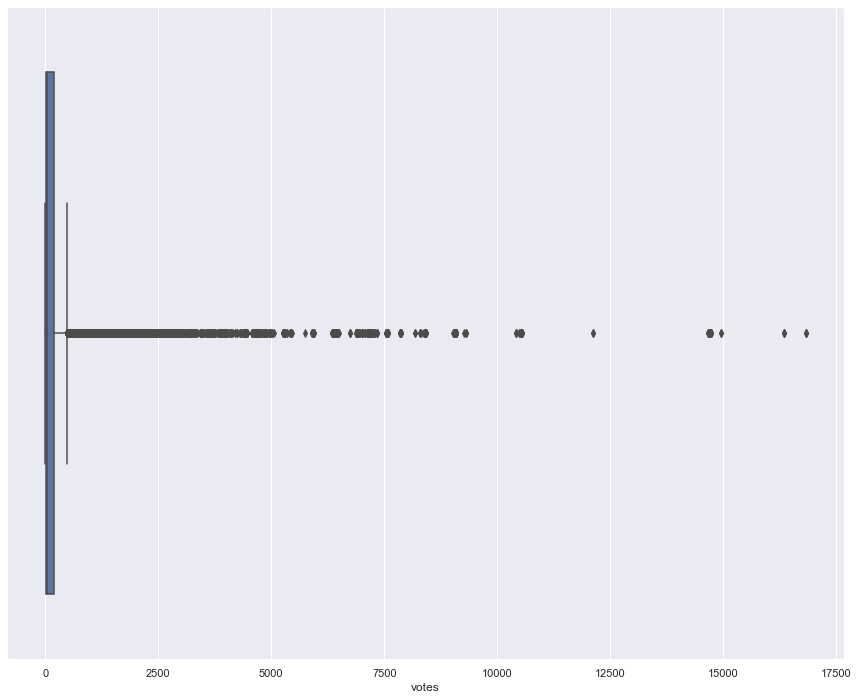

In [9]:
sns.boxplot(data=df, x=df.votes)

### Note: This Can Not be Outliers because the votes can vary from resturant to other resturant

# EDA

## What is the most City that has Resturants ?

<AxesSubplot:xlabel='listed_in(city)', ylabel='count'>

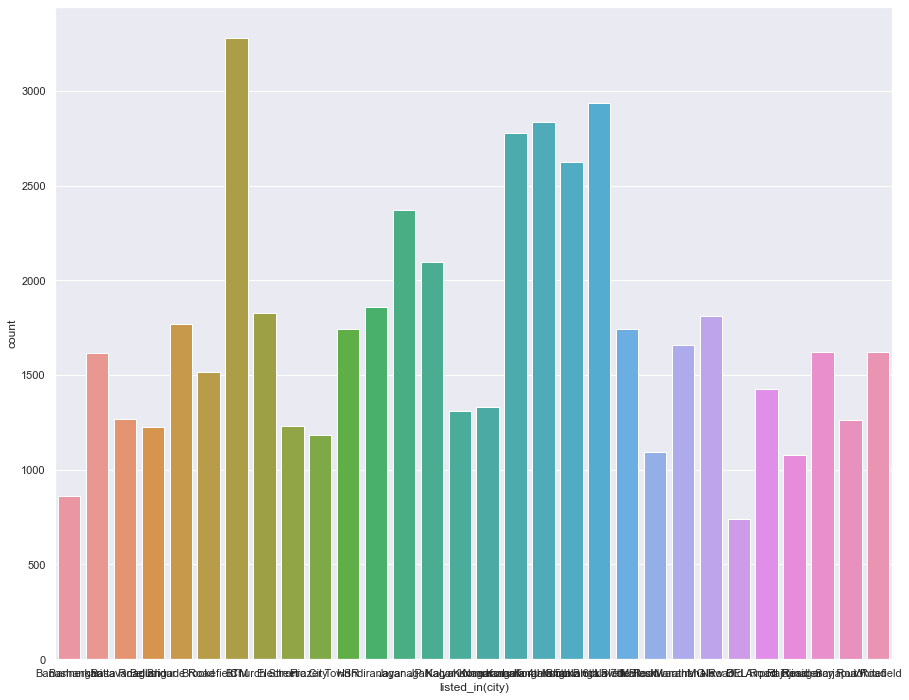

In [261]:
sns.countplot(data=df, x=df['listed_in(city)'])

## What is the most Frequent Type of resturant ?

<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

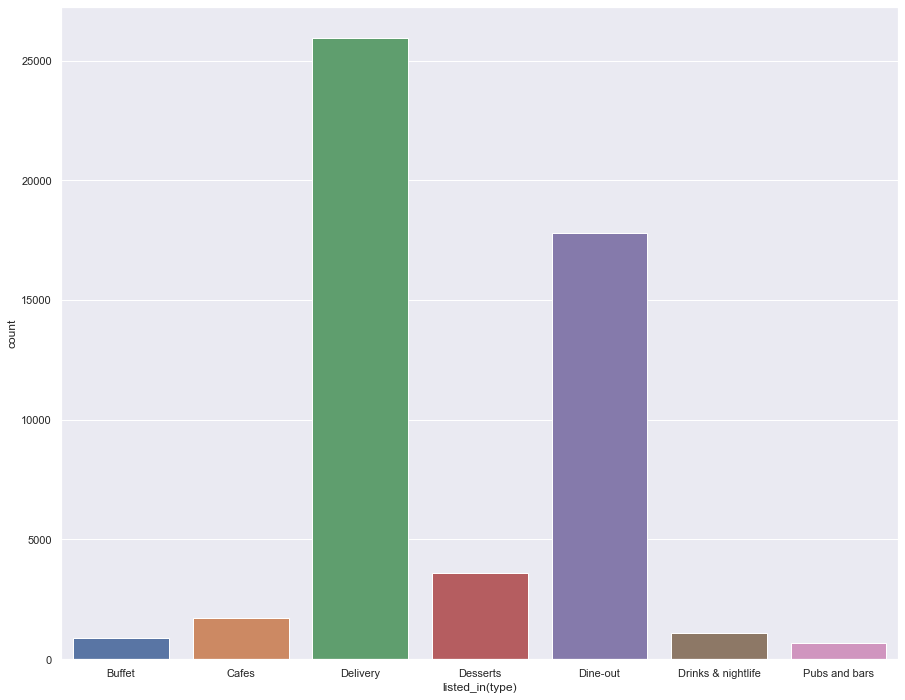

In [262]:
sns.countplot(data=df, x=df['listed_in(type)'] )

## Are People Prefering Online Order ?

<AxesSubplot:xlabel='online_order', ylabel='count'>

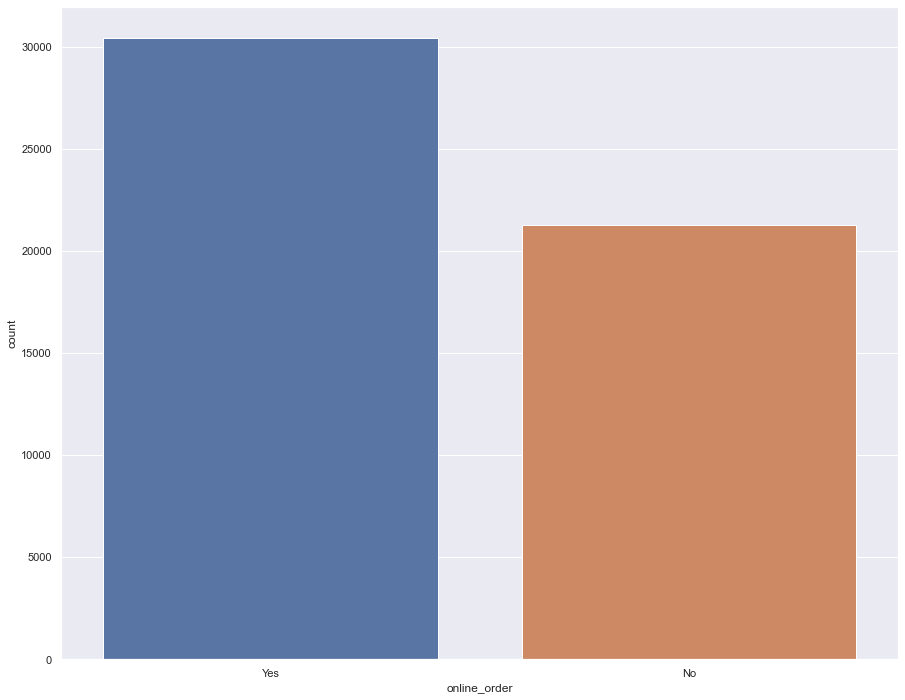

In [264]:
sns.countplot(data=df, x=df['online_order'])

## Are People Prefering Booking Table From Home ?

<AxesSubplot:xlabel='book_table', ylabel='count'>

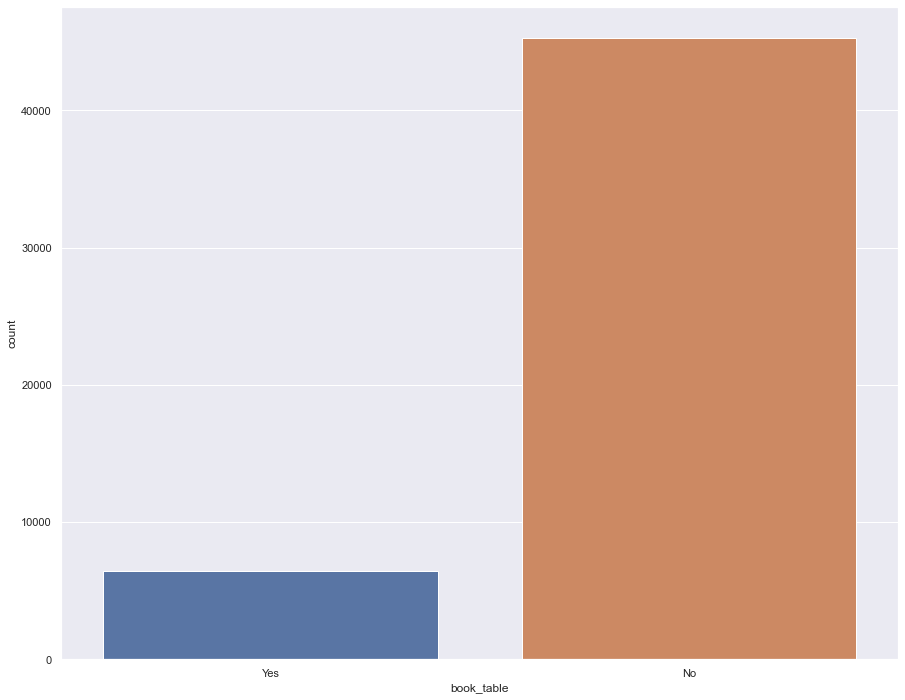

In [265]:
sns.countplot(data=df, x=df['book_table'])

# Preprocessing

## Drop "Name" Column

In [6]:
df.drop(columns='name',inplace=True)

## Label Encoding 

In [7]:
#Label encoding Using Map for Each Categorical Value

online_order_map = {                             
    'No':0,
    'Yes':1
}

book_table_map = {
    'No':0,
    'Yes':1
}

listed_in_t_map = {                             
    'Buffet':0,
    'Cafes':1,
    'Delivery':2,
    'Desserts':3,
    'Dine-out':4,
    'Drinks & nightlife':5,
    'Pubs and bars':6,
}

listed_in_c_map = {
'Banashankari':1, 
'Bannerghatta Road':2, 
'Basavanagudi':3, 
'Bellandur':4,       
'Brigade Road':5, 
'Brookefield':6, 
'BTM':7, 
'Church Street':8,       
'Electronic City':9, 
'Frazer Town':10, 
'HSR':11, 
'Indiranagar':12,       
'Jayanagar':13, 
'JP Nagar':14, 
'Kalyan Nagar':15, 
'Kammanahalli':16,       
'Koramangala 4th Block':17, 
'Koramangala 5th Block':18,
'Koramangala 6th Block':19,
'Koramangala 7th Block':20, 
'Lavelle Road':21,
'Malleshwaram':22, 
'Marathahalli':23, 
'MG Road':24, 
'New BEL Road':25,
'Old Airport Road':26, 
'Rajajinagar':27, 
'Residency Road':28,
'Sarjapur Road':29, 
'Whitefield' :30,
}

In [8]:
df['online_order'] = df['online_order'].map(online_order_map)

df['book_table'] = df['book_table'].map(book_table_map)

df['listed_in(type)'] = df['listed_in(type)'].map(listed_in_t_map)

df['listed_in(city)'] = df['listed_in(city)'].map(listed_in_c_map)

df.head(5)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,800,0,1
1,1,0,4.1,787,800,0,1
2,1,0,3.8,918,800,0,1
3,0,0,3.7,88,300,0,1
4,0,0,3.8,166,600,0,1


## Split Comma in "approx_cost(for two people)" Column	

In [9]:
def Drop_comma(x):
   
   x = str(x)

   if len(x) >= 5 :

      x = x.split(sep=",")
      x1 = "".join(x)
      x1 = int(x1)
   
   elif x == 'nan':
      x1 = np.nan

   else:
      x1 = int(x)
   
   return x1

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(Drop_comma)
df.head(5)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,800.0,0,1
1,1,0,4.1,787,800.0,0,1
2,1,0,3.8,918,800.0,0,1
3,0,0,3.7,88,300.0,0,1
4,0,0,3.8,166,600.0,0,1


## KNN Imputer to impute Missing Value

In [11]:
from sklearn.impute import KNNImputer

Imputer = KNNImputer(n_neighbors=3)

df = Imputer.fit_transform(df)

In [12]:
df = pd.DataFrame(df,columns=['online_order','book_table','rate','votes','approx_cost(for two people)','listed_in(type)','listed_in(city)'])
df

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,1.0,1.0,4.100000,775.0,800.0,0.0,1.0
1,1.0,0.0,4.100000,787.0,800.0,0.0,1.0
2,1.0,0.0,3.800000,918.0,800.0,0.0,1.0
3,0.0,0.0,3.700000,88.0,300.0,0.0,1.0
4,0.0,0.0,3.800000,166.0,600.0,0.0,1.0
...,...,...,...,...,...,...,...
51712,0.0,0.0,3.600000,27.0,1500.0,6.0,30.0
51713,0.0,0.0,3.233333,0.0,600.0,6.0,30.0
51714,0.0,0.0,3.233333,0.0,2000.0,6.0,30.0
51715,0.0,1.0,4.300000,236.0,2500.0,6.0,30.0


## Convert rate into Target with 1 and 0 

In [13]:
def Conversion(x):

    if x > 3.7:
        x = 1
    else:
        x = 0
    
    return x     

In [14]:
df['rate'] = df.rate.apply(Conversion)
df.head(5)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,1.0,1.0,1,775.0,800.0,0.0,1.0
1,1.0,0.0,1,787.0,800.0,0.0,1.0
2,1.0,0.0,1,918.0,800.0,0.0,1.0
3,0.0,0.0,0,88.0,300.0,0.0,1.0
4,0.0,0.0,1,166.0,600.0,0.0,1.0


## Train_Test Split

In [15]:
x = df.drop('rate', axis=1)                   #Put All Features in x Variable (Excluding the Target)
y = df['rate']                                #Put the Target in Y Variable

In [16]:
from sklearn.model_selection import train_test_split              #Split the Data into Train and Test with No rendom Choice of Data each time

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Imbalanced Classes

In [27]:
! pip install imblearn 

In [32]:
pip install -U imbalanced-learn

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

## Data Normalization (Scaling)

In [18]:
from sklearn.preprocessing import PowerTransformer             # Normalize the Values So no Feature effect the other

Scalar = PowerTransformer()

Scalar.fit_transform(X_train_res)

array([[ 0.81233188, -0.43080991,  1.39815499,  0.14316478, -0.68450112,
         0.24788911],
       [ 0.81233188, -0.43080991,  0.35457932, -0.1940791 , -0.68450112,
        -0.9199289 ],
       [ 0.81233188, -0.43080991, -0.12637366, -1.30180395, -0.68450112,
        -0.12316699],
       ...,
       [-1.2570417 , -0.43080991,  1.8259739 ,  0.63457611, -1.70583981,
         0.27657837],
       [ 0.81233188, -0.43080991,  0.13570182, -0.93505244, -0.68450112,
        -1.09979268],
       [ 0.81233188, -0.43080991,  0.64478511, -0.64260418, -0.68450112,
        -0.83677278]])

In [19]:
from sklearn.preprocessing import PowerTransformer                     # Normalize the Values So no Feature effect the other
   
Scalar = PowerTransformer()

Scalar.fit_transform(x_test)

array([[-1.18689441, -0.37578984, -1.51196704, -2.51361352,  1.02287829,
         0.36193875],
       [ 0.84253493,  2.66106182,  1.28242481,  0.72558995, -0.68827221,
         0.0042272 ],
       [ 0.84253493, -0.37578984,  0.27599968, -0.11213676,  1.02287829,
        -0.90344948],
       ...,
       [-1.18689441, -0.37578984, -1.51196704, -0.57095337,  1.02287829,
        -0.36995748],
       [ 0.84253493,  2.66106182,  1.19493188,  0.50183252, -0.68827221,
        -0.11847393],
       [ 0.84253493, -0.37578984, -0.25138263,  0.23038197, -0.68827221,
         1.4697764 ]])

# ML Models

## Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

pred = model.predict(x_test)

model.score(x_test,y_test)

0.8165506573859243

## KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)

neigh.score(x_test,y_test)

0.8689868522815158

## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20)

Tree.fit(X_train_res, y_train_res)

r2_train = Tree.score(X_train_res, y_train_res)
r2_test = Tree.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.8389424106187112
R2 Score of Decision Tree Test: 0.8184841453982985


## Random Forest 

In [23]:
from sklearn.model_selection import GridSearchCV

Desicion_Tree = DecisionTreeClassifier()
parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'max_leaf_nodes': [10, 15, 20, 25, 30]
}

grid = GridSearchCV(Desicion_Tree, parameters)

In [24]:
grid.fit(X_train_res, y_train_res)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_leaf_nodes': [10, 15, 20, 25, 30]})

In [25]:
r2_train = grid.score(X_train_res, y_train_res)
r2_test = grid.score(x_test, y_test)

print(f"R2 Score of Decision Tree Training: {r2_train}")
print(f"R2 Score of Decision Tree Test: {r2_test}")

R2 Score of Decision Tree Training: 0.8466709484050524
R2 Score of Decision Tree Test: 0.8358855375096674


In [26]:
grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 25}

## XGBoost Classifier

In [27]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=8, max_depth=7, max_leaves=20)

XGB.fit(X_train_res, y_train_res)

r2_train = XGB.score(X_train_res, y_train_res)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.865467779918647
R2 Score of XGBoost Test: 0.8449342614075793


In [28]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=11, max_depth=8, max_leaves=30)

XGB.fit(X_train_res, y_train_res)

r2_train = XGB.score(X_train_res, y_train_res)
r2_test = XGB.score(x_test, y_test)

print(f"R2 Score of XGBoost Training: {r2_train}")
print(f"R2 Score of XGBoost Test: {r2_test}")

R2 Score of XGBoost Training: 0.8756583172768144
R2 Score of XGBoost Test: 0.8527455529775715


# Deploy Model

In [73]:
import joblib

joblib.dump(neigh, 'Final_Model.h5')

['Final_Model.h5']

# StreamLit Module

In [75]:
! pip install --user streamlit

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.



  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Using cached tzlocal-5.0.1-py3-none-any.whl (20 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached pyarrow-12.0.0-cp38-cp38-win_amd64.whl (21.5 MB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached protobuf-3.20.3-cp38-cp38-win_amd64.whl (904 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached rich-13.3.5-py3-none-any.whl (238 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached backport

# Modules Versions

In [76]:
!pip list

Package                            Version
---------------------------------- -------------------
-                                  blib
-.blib                             1.0.1
-blib                              1.0.1
-eaborn                            0.11.1
-oblib                             1.0.1
-yping-extensions                  3.7.4.3
alabaster                          0.7.12
altair                             4.2.2
anaconda-client                    1.7.2
anaconda-navigator                 2.1.1
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5


xlrd                               2.0.1
XlsxWriter                         1.3.8
xlwings                            0.23.0
xlwt                               1.3.0
xmltodict                          0.12.0
yapf                               0.31.0
zict                               2.0.0
zipp                               3.4.1
zope.event                         4.5.0
zope.interface                     5.3.0


numpy                              1.20.1

pandas                             1.2.4

seaborn                            0.11.1

scikit-learn                       1.2.2

imbalanced-learn                   0.10.1

xgboost                            1.6.2

streamlit                          1.22.0